In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection as RP

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']

# data import and preprocessing


In [2]:
##### Adult Income
### http://archive.ics.uci.edu/ml/datasets/Adult
data = pd.read_csv('datafiles/adult.csv')
data

y_data_raw = data.income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_data_raw.values.tolist())
y_data = le.transform(y_data_raw)


x_data_raw = data.loc[:,'age':'native-country']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(x_data_raw.values.tolist())
x_data = enc.transform(x_data_raw)

# temp = enc.inverse_transform(x_data)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [13]:
x_data

array([[2.2000e+01, 7.0000e+00, 2.6710e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [3.3000e+01, 6.0000e+00, 2.9260e+03, ..., 0.0000e+00, 1.2000e+01,
        3.9000e+01],
       [2.1000e+01, 4.0000e+00, 1.4086e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       ...,
       [4.1000e+01, 4.0000e+00, 7.8830e+03, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01],
       [5.0000e+00, 4.0000e+00, 1.2881e+04, ..., 0.0000e+00, 1.9000e+01,
        3.9000e+01],
       [3.5000e+01, 5.0000e+00, 1.7825e+04, ..., 0.0000e+00, 3.9000e+01,
        3.9000e+01]])

In [26]:
y_data_raw

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

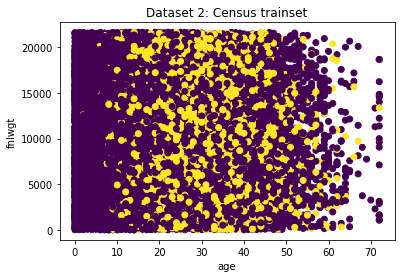

In [69]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset')
plt.xlabel('age')
plt.ylabel('year of education')
# plt.ylabel('fnlwgt')
plt.savefig(f'part2/census.png')
plt.show()

In [44]:
y_train.tolist().count(0)

17343

In [45]:
y_train.tolist().count(1)

5449

# modify thisDR!!!

# modify DR function handle:

from sklearn.decomposition import PCA, FastICA, NMF

from sklearn.random_projection import GaussianRandomProjection as RP

In [3]:
thisDR = 'initial' 
# 'initial' if no DR. Skip section 1 

x_train_transform = x_train # default for 'initial'
x_test_transform = x_test # default for 'initial'

# 1. Dimensionality Reduction

In [ ]:
DR = NMF(n_components = 16,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"Dimensionality Reduction Algorithm training time {toc - tic} seconds")
print()

In [ ]:
# Kurtosis & Reconstruction Error
numfeatures = x_train.shape[1]
numfeatures = 11
kurtosis_all = []
reconstr_err_all = []
for i in range(1, 1+numfeatures):
    DR = NMF(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    
    kurt = kurtosis(DR.components_.T)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    print(DR.n_iter_)
    reconstr_err_all.append(DR.reconstruction_err_)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title(f'{thisDR} - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig(f'part2/{thisDR}_kurtosis.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), reconstr_err_all, marker = 'o')
plt.title(f'{thisDR} - reconstruction error')
plt.xlabel('Number of clusters')
plt.ylabel('mean squared error')
plt.grid()
plt.savefig(f'part2/{thisDR}_mse.png')
plt.show()

In [ ]:
# 7 component is best ?

best_n_components = 4
bestDR = NMF(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(x_train)
x_test_transform = bestDR.fit_transform(x_test)
x_train_inverse = bestDR.inverse_transform(x_train_transform)

# Reconstruction Error
mse = np.sum(np.square(x_train.values - x_train_inverse))/x_train_inverse.size
print('MSE: ', mse)
#  MSE:  0.002285813672259965 for n=4

In [ ]:
x_train_transform

In [ ]:
x_train_inverse

# 2. after dimensional reduction: KMeans

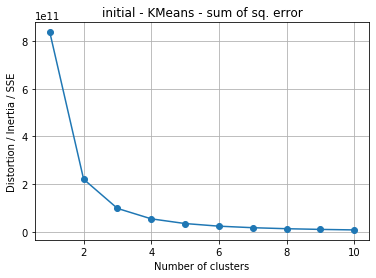

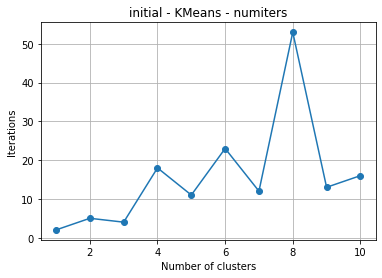

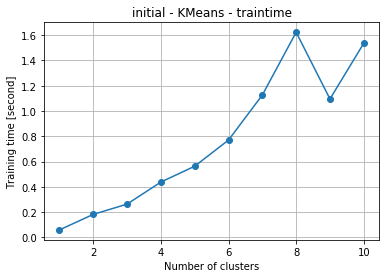

In [4]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    print()
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## KMeans n=2
### compare with original labeling

In [35]:
km2 = KMeans(n_clusters = 2, random_state = my_random_state)


tic = time.perf_counter() 
km2.fit(x_train_transform)
toc = time.perf_counter() 
print(f"training time {toc - tic} seconds")
print()

print(km2.cluster_centers_)
print(km2.labels_)
print(km2.inertia_)
print(km2.n_iter_)

training time 0.1883176999999705 seconds

[[2.04498323e+01 3.83531225e+00 1.58941397e+04 1.02050213e+01
  8.96909272e+00 2.66600199e+00 6.56920149e+00 1.45599565e+00
  3.66890238e+00 6.76969093e-01 6.13504940e+00 1.84682317e+00
  3.91061361e+01 3.64050576e+01]
 [2.27374777e+01 3.91181223e+00 5.49758593e+03 1.03947615e+01
  9.17458968e+00 2.56518411e+00 6.55234289e+00 1.43243473e+00
  3.66629815e+00 6.59749979e-01 6.53337869e+00 2.25827026e+00
  3.95551492e+01 3.70813845e+01]]
[0 1 1 ... 1 1 1]
221178603859.24338
5


In [42]:
km2.labels_.tolist().count(2)

0

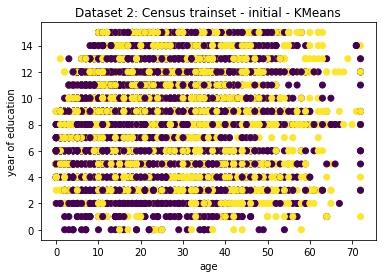

In [36]:

plt.scatter(x_train[:,0],x_train[:,4], c=km2.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

[[8485 8858]
 [2551 2898]]
Prediction accuracy on train set: 0.4994296244296244


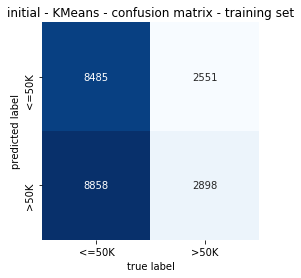

In [47]:
species = ['<=50K','>50K']

y_train_km2 = []
for l in km2.labels_:
    y_train_km2.append(species[l])
    
train_confmat_km2 = confusion_matrix(y_train, km2.labels_)
train_accu_km2 = accuracy_score(y_train, km2.labels_)
print(train_confmat_km2)
print(f"Prediction accuracy on train set: {train_accu_km2}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

In [48]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, km2.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(y_train, km2.labels_)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  221178603859.24338
Silhouette score:  0.614270370960242
Adjusted Mutual Information (AMI) score:  0.0002254992082652779


In [50]:
tic = time.perf_counter() 
y_test_predict2 = km2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict2

testing time 0.0022675999998682528 seconds



array([1, 1, 1, ..., 0, 1, 1])

In [53]:
y_test_predict2.tolist().count(0)

4714

[[3583 3794]
 [1131 1261]]
Prediction accuracy on test set: 0.49585423277715224


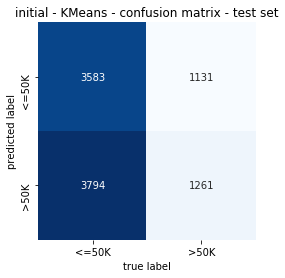

In [52]:

species = ['<=50K','>50K']
y_test_km2 = []
for pred in y_test_predict2:
    y_test_km2.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km2 = confusion_matrix(y_test, y_test_predict2)
test_accu_km2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_km2)
print(f"Prediction accuracy on test set: {test_accu_km2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')



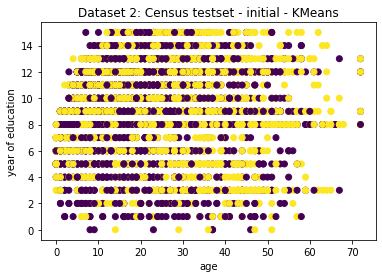

In [54]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [55]:
# Evaluate quality of clusters
print('test set')
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.6110679495853727
Adjusted Mutual Information (AMI) score:  1.630285098626295e-05


## KMeans n=? 
### change best_n_clusters!  determined from graph

In [70]:
best_n_clusters = 3
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.2720759000003454 seconds

[[2.01145997e+01 3.83659198e+00 1.78636481e+04 1.01552733e+01
  8.88911089e+00 2.68217497e+00 6.53646354e+00 1.44855145e+00
  3.62037962e+00 6.90595119e-01 6.13015556e+00 1.80162694e+00
  3.90934780e+01 3.62503211e+01]
 [2.26028147e+01 3.92898097e+00 3.67579711e+03 1.03991400e+01
  9.18634350e+00 2.57049778e+00 6.55056033e+00 1.42754756e+00
  3.66093302e+00 6.64321084e-01 6.30271045e+00 2.20250195e+00
  3.95443054e+01 3.72509773e+01]
 [2.20189866e+01 3.85649118e+00 1.06802499e+04 1.03394156e+01
  9.13056343e+00 2.59622735e+00 6.59067932e+00 1.45518432e+00
  3.71458513e+00 6.52200715e-01 6.55813093e+00 2.14585131e+00
  3.93534706e+01 3.67189003e+01]]
[2 1 2 ... 1 2 1]
98879402898.25815
4


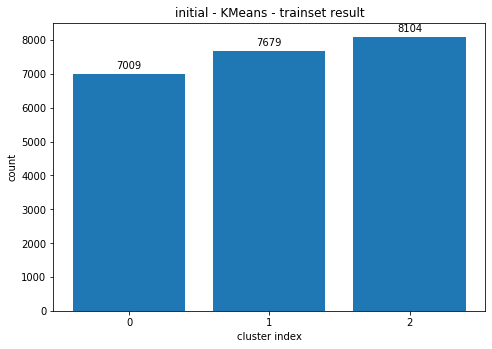

In [71]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [72]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  98879402898.25815
Silhouette score:  0.5814917372727965
Adjusted Mutual Information (AMI) score:  0.0004993948864122151


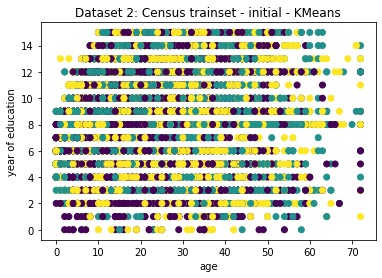

In [73]:

plt.scatter(x_train[:,0],x_train[:,4], c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [74]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0020491000004767557 seconds



array([1, 1, 1, ..., 0, 1, 1])

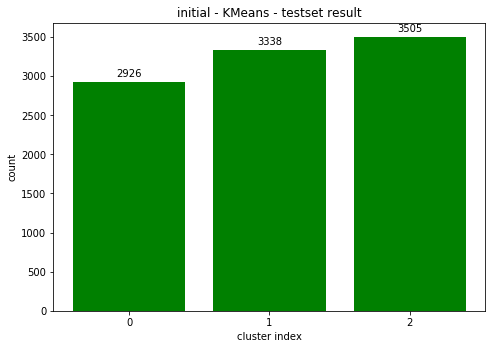

In [75]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [76]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.5823832749233407
Adjusted Mutual Information (AMI) score:  -2.5717512601724943e-06


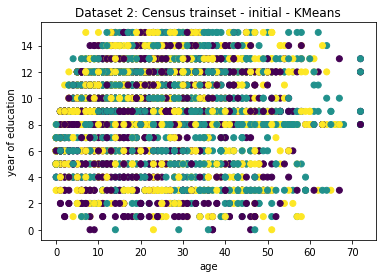

In [77]:

plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 3. after dimensional reduction: Expectation Maximization (EM)

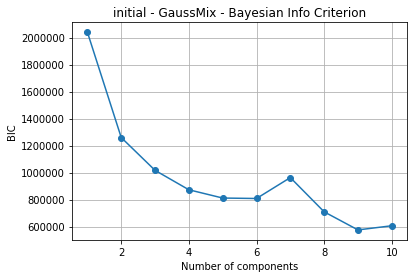

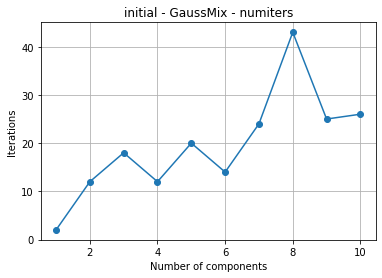

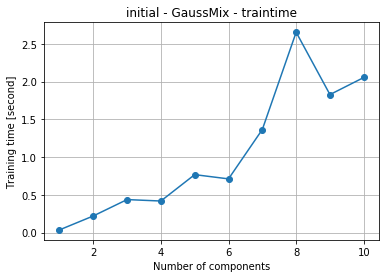

In [78]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## Gaussian Mixture best_n_component = 2
### compare with original labeling

In [79]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 2
gm2 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm2.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict2 = gm2.predict(x_train_transform)
y_train_predict2

training time 0.22065870000005816 seconds



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [84]:
y_train_predict2.tolist().count(1)

19855

[[16091  1252]
 [ 3764  1685]]
Prediction accuracy on train set: 0.7799227799227799


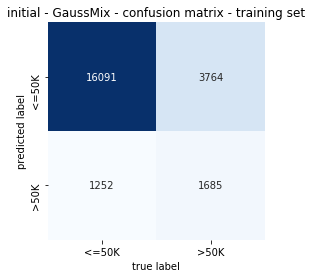

In [93]:
species = ['<=50K','>50K']

# y_train_gm2 = []
# for l in y_train_predict2:
#     y_train_gm2.append(species[l])

y_train_predict2 = -1*(y_train_predict2 - 1) # inverse 0 & 1 if necessary

train_confmat_gm2 = confusion_matrix(y_train, y_train_predict2)
train_accu_gm2 = accuracy_score(y_train, y_train_predict2)
print(train_confmat_gm2)
print(f"Prediction accuracy on train set: {train_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(train_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')

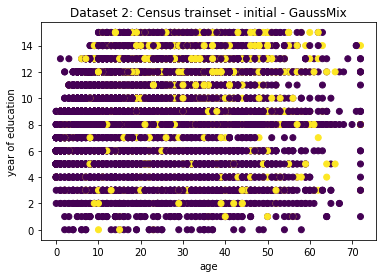

In [100]:

plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [94]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km2.inertia_)
score = silhouette_score(x_train_transform, y_train_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  -0.006526644637611735
Adjusted Mutual Information (AMI) score:  0.08359333352857207


In [95]:

tic = time.perf_counter() 
y_test_predict2 = gm2.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict2

testing time 0.005499999999301508 seconds



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

[[6848  529]
 [1627  765]]
Prediction accuracy on train set: 0.779301873272597


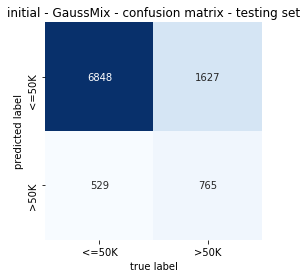

In [96]:
species = ['<=50K','>50K']

y_test_predict2 = -1*(y_test_predict2 - 1) # inverse 0 & 1 if necessary

test_confmat_gm2 = confusion_matrix(y_test, y_test_predict2)
test_accu_gm2 = accuracy_score(y_test, y_test_predict2)
print(test_confmat_gm2)
print(f"Prediction accuracy on train set: {test_accu_gm2}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm2.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - testing set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [98]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict2)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict2)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  -0.01302902391117576
Adjusted Mutual Information (AMI) score:  0.09006416343710141


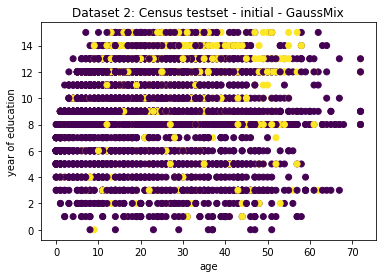

In [99]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict2, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()



## Gaussian Mixture best_n_component = ?
### change best_n_component!  determined from graph

In [101]:
best_n_component = 6
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.7205151999996815 seconds



array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [102]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  -0.07908553724632986
Adjusted Mutual Information (AMI) score:  0.0593248705145657


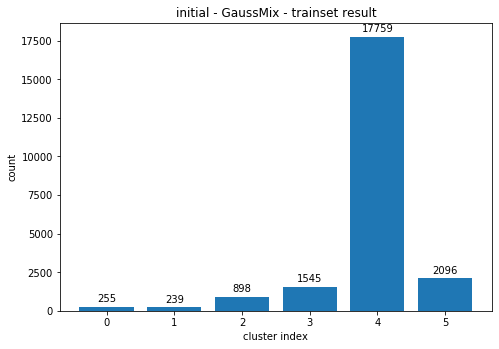

In [103]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

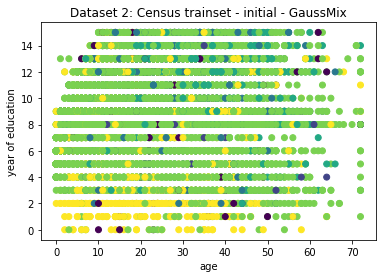

In [104]:
plt.scatter(x_train[:,0],x_train[:,4], c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census trainset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [105]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.012100200000531913 seconds



array([4, 3, 2, ..., 4, 4, 4], dtype=int64)

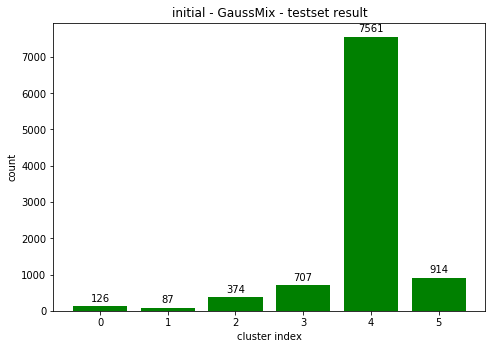

In [106]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [107]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  -0.08490135017470073
Adjusted Mutual Information (AMI) score:  0.06285693336443425


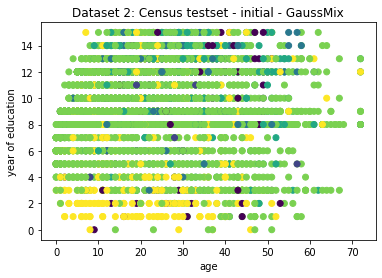

In [108]:
plt.scatter(x_test[:,0],x_test[:,4], c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 2: Census testset - {thisDR} - {thisClust}')
plt.xlabel('age')
plt.ylabel('year of education')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()